In [1]:
import os
import numpy as np
import tensorflow_datasets as tfds
from imbDRL.agents.ddqn import TrainDDQN
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout


def run_dqn(df, y, eps, ws, bs, lr):
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

    episodes = eps
    warmup_steps = ws
    memory_length = warmup_steps
    batch_size = bs
    collect_steps_per_episode = 500
    collect_every = 500

 
    target_update_period = 400
    target_update_tau = 1
    n_step_update = 1

 
    layers = [
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(2, activation=None)
    ]

 

    learning_rate = lr
    gamma = 0.0
    min_epsilon = 0.5
    decay_episodes = episodes // 10


    min_class = [1]
    maj_class = [0]

 
    X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), y.to_numpy(), stratify=y, test_size=0.3)
    X_train, y_train, X_test, y_test, X_val, y_val = get_train_test_val(
        X_train, y_train, X_test, y_test, min_class, maj_class, val_frac=0.9

    )


    model = TrainDDQN(
        episodes,
        warmup_steps,
        learning_rate,
        gamma,
        min_epsilon,
        decay_episodes,
        target_update_period=target_update_period,
        target_update_tau=target_update_tau,
        batch_size=batch_size,
        collect_steps_per_episode=collect_steps_per_episode,
        memory_length=memory_length,
        collect_every=collect_every,
        n_step_update=n_step_update,
        model_path='modelfiles.pkl'

    )

 

    model.compile_model(X_train, y_train, layers)
    model.train(X_val, y_val, "F1")
    stats = model.evaluate(X_test, y_test, X_train, y_train)

    return rounded_dict(stats)


2023-05-31 15:21:48.035970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 15:21:49.505504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Pokemon.csv")


In [4]:
df.columns

Index(['Unnamed: 0', '#', 'Name', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Type 1_Bug',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon',
       'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire',
       'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground',
       'Type 2_Ice', 'Type 2_None', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 0','#','Name'])

In [6]:
y = df['Legendary']

In [7]:
df = df.drop(columns=['Legendary'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), y.to_numpy(), stratify=y, test_size=0.9)


Imbalance ratio `p`:
	train:      n=5, p=0.098039
	test:       n=19, p=0.085973
	validation: n=41, p=0.088553


2023-05-31 15:21:54.061270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-31 15:21:54.061309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: heron178.eps.surrey.ac.uk
2023-05-31 15:21:54.061320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: heron178.eps.surrey.ac.uk
2023-05-31 15:21:54.061433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 515.65.1
2023-05-31 15:21:54.061457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 515.65.1
2023-05-31 15:21:54.061465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 515.65.1


10_000 frames collected!
Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.
Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


2023-05-31 15:21:56.351790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_15' with dtype resource
	 [[{{node Placeholder/_15}}]]
2023-05-31 15:21:56.352091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype resource
	 [[{{node Placeholder/_8}}]]
Training the DDQN:   5%|▉                 | 500/10000 [00:00<00:04, 2177.70it/s]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Training the DDQN: 100%|█████████████████| 10000/10000 [00:16<00:00, 609.83it/s]

Best score: 0.150459!


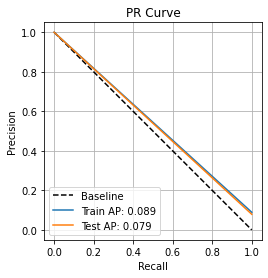

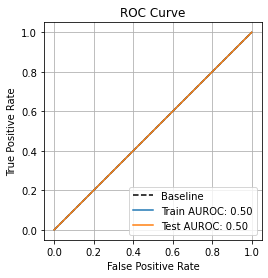

{'Gmean': 0.0,
 'F1': 0.146718,
 'Precision': 0.079167,
 'Recall': 1.0,
 'TP': 19,
 'TN': 0,
 'FP': 221,
 'FN': 0}

In [9]:
run_dqn (df,y,10000,10000,100,0.005)

Imbalance ratio `p`:
	train:      n=5, p=0.098039
	test:       n=19, p=0.085973
	validation: n=41, p=0.088553


2023-05-31 15:22:27.290608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-31 15:22:27.290898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype resource
	 [[{{node Placeholder/_11}}]]


100_000 frames collected!


Training the DDQN: 100%|███████████████| 100000/100000 [01:41<00:00, 987.53it/s]

Best score: 0.150094!


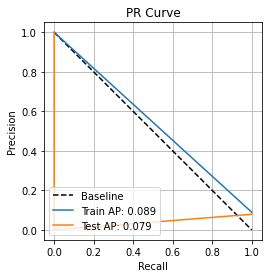

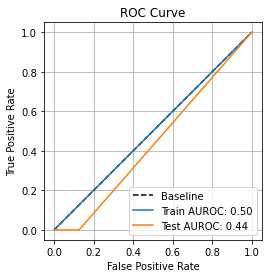

{'Gmean': 0.164771,
 'F1': 0.150198,
 'Precision': 0.081197,
 'Recall': 1.0,
 'TP': 19,
 'TN': 6,
 'FP': 215,
 'FN': 0}

In [10]:
run_dqn (df,y,100000,100000,5,0.05)

Imbalance ratio `p`:
	train:      n=4, p=0.076923
	test:       n=20, p=0.090909
	validation: n=41, p=0.088553


2023-05-31 15:24:10.568226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]
2023-05-31 15:24:10.568530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:15<00:00, 659.73it/s]

Best score: 0.258065!


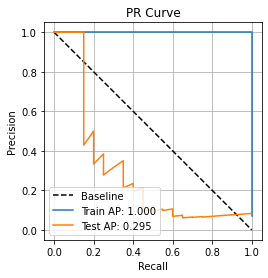

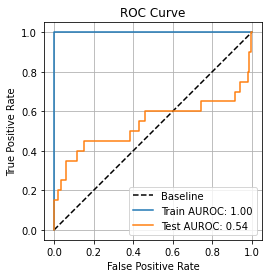

{'Gmean': 0.665719,
 'F1': 0.363636,
 'Precision': 0.285714,
 'Recall': 0.5,
 'TP': 10,
 'TN': 195,
 'FP': 25,
 'FN': 10}

In [11]:
run_dqn (df,y,10000,10000,50,0.0005)

In [12]:
df1=pd.read_csv("Pokemon.csv")
df1 = df1.drop(columns=['Unnamed: 0','#','Name'])

In [13]:
normal = df1.loc[df1["Legendary"] == 0]
legendary = df1.loc[df1["Legendary"] == 1]
sample = normal.sample(100)

In [14]:
X = pd.concat([legendary, sample])

In [15]:
y1 = X['Legendary']
X= X.drop(columns=['Legendary'])

Imbalance ratio `p`:
	train:      n=4, p=0.571429
	test:       n=20, p=0.666667
	validation: n=41, p=0.650794


2023-05-31 15:24:27.943772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]
2023-05-31 15:24:27.944063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:16<00:00, 590.93it/s]

Best score: 0.514851!


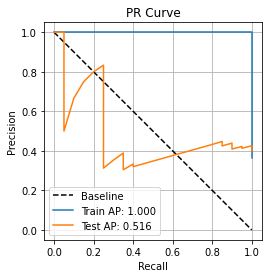

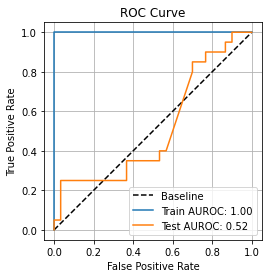

{'Gmean': 0.516398,
 'F1': 0.454545,
 'Precision': 0.416667,
 'Recall': 0.5,
 'TP': 10,
 'TN': 16,
 'FP': 14,
 'FN': 10}

In [16]:
run_dqn (X,y1,10000,10000,100,0.005)

Imbalance ratio `p`:
	train:      n=4, p=0.571429
	test:       n=20, p=0.666667
	validation: n=41, p=0.650794


2023-05-31 15:32:39.471315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype resource
	 [[{{node Placeholder/_11}}]]
2023-05-31 15:32:39.471616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype resource
	 [[{{node Placeholder/_11}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:11<00:00, 837.73it/s]

Best score: 0.573529!


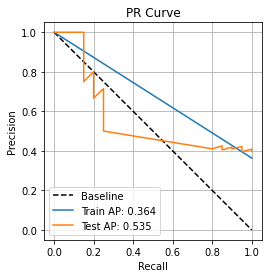

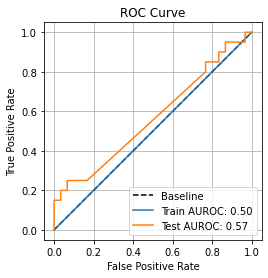

{'Gmean': 0.251661,
 'F1': 0.567164,
 'Precision': 0.404255,
 'Recall': 0.95,
 'TP': 19,
 'TN': 2,
 'FP': 28,
 'FN': 1}

In [20]:
run_dqn (X,y1,10000,10000,5,0.05)

Imbalance ratio `p`:
	train:      n=4, p=0.571429
	test:       n=20, p=0.666667
	validation: n=41, p=0.650794


2023-05-31 15:29:07.708448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype resource
	 [[{{node Placeholder/_9}}]]
2023-05-31 15:29:07.708749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:14<00:00, 688.82it/s]

Best score: 0.636364!


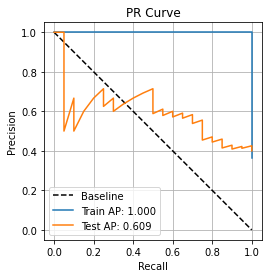

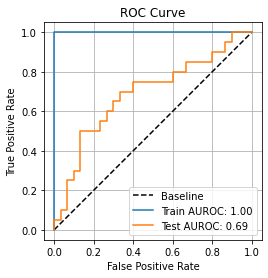

{'Gmean': 0.6245,
 'F1': 0.577778,
 'Precision': 0.52,
 'Recall': 0.65,
 'TP': 13,
 'TN': 18,
 'FP': 12,
 'FN': 7}

In [19]:
run_dqn (X,y1,10000,10000,50,0.0005)